<a href="https://colab.research.google.com/github/BhavyaManvitha-Chinni/EDAonEV/blob/main/EDA_TASK_ON_EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/dataset.csv")
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [2]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [3]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [5]:
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [7]:
df_clean = df.drop_duplicates()
duplicate_rows_after = df_clean.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_after}")

Number of duplicate rows after removal: 0


In [8]:
df_clean['Postal Code'] = df_clean['Postal Code'].astype(str)
df_clean['Model Year'] = df_clean['Model Year'].astype(int)
df_clean['Electric Range'] = pd.to_numeric(df_clean['Electric Range'], errors='coerce')
df_clean['Base MSRP'] = pd.to_numeric(df_clean['Base MSRP'], errors='coerce')
df_clean['Legislative District'] = df_clean['Legislative District'].astype(int)

In [9]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [10]:
df_clean = remove_outliers(df_clean, 'Electric Range')
df_clean = remove_outliers(df_clean, 'Base MSRP')

In [11]:
df_clean['VIN_Short'] = df_clean['VIN (1-10)'].str[:10]
current_year = 2024
df_clean['Age of Vehicle'] = current_year - df_clean['Model Year']

In [12]:
categorical_cols = ['County', 'City', 'State', 'Make', 'Model',
                    'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                    'Vehicle Location', 'Electric Utility']

In [14]:
# Import the LabelEncoder class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

In [15]:
print(df_clean.info())
print(df_clean.isnull().sum())
print(df_clean.describe())
for col in categorical_cols:
    print(f"Unique values in {col}: {df_clean[col].nunique()}")

<class 'pandas.core.frame.DataFrame'>
Index: 109122 entries, 0 to 112633
Data columns (total 19 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         109122 non-null  object
 1   County                                             109122 non-null  int64 
 2   City                                               109122 non-null  int64 
 3   State                                              109122 non-null  int64 
 4   Postal Code                                        109122 non-null  object
 5   Model Year                                         109122 non-null  int64 
 6   Make                                               109122 non-null  int64 
 7   Model                                              109122 non-null  int64 
 8   Electric Vehicle Type                              109122 non-null  int64 
 9   Clean Alt

# UNIVARIATE ANALYSIS

In [16]:
print(df_clean[['Electric Range', 'Base MSRP']].describe())

       Electric Range  Base MSRP
count   109122.000000   109122.0
mean        86.593812        0.0
std        102.497479        0.0
min          0.000000        0.0
25%          0.000000        0.0
50%         32.000000        0.0
75%        208.000000        0.0
max        337.000000        0.0


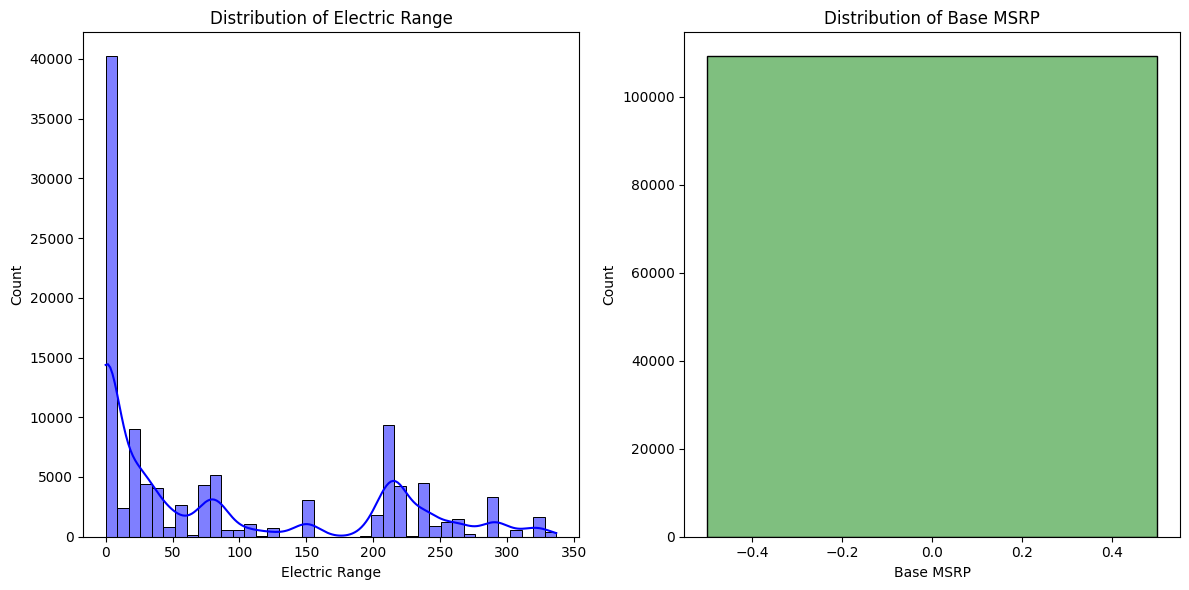

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['Electric Range'], kde=True, color='blue')
plt.title('Distribution of Electric Range')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['Base MSRP'], kde=True, color='green')
plt.title('Distribution of Base MSRP')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


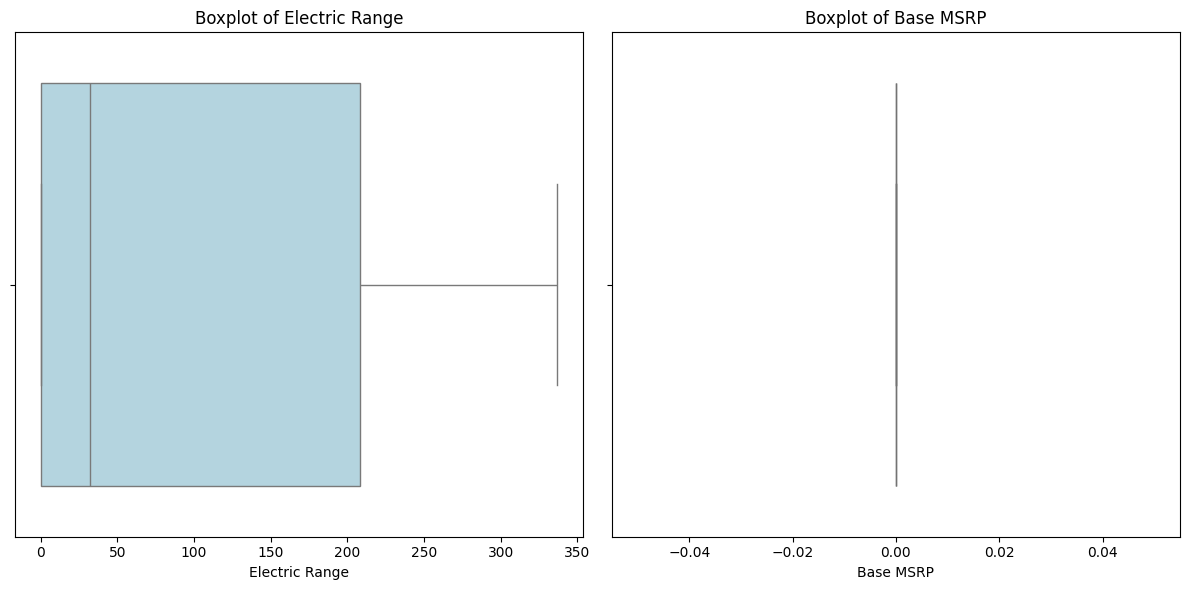

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['Electric Range'], color='lightblue')
plt.title('Boxplot of Electric Range')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Base MSRP'], color='lightgreen')
plt.title('Boxplot of Base MSRP')

plt.tight_layout()
plt.show()


<ipython-input-22-33aeffa913a5>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['Electric Range'], color='blue', shade=True)
<ipython-input-22-33aeffa913a5>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['Base MSRP'], color='green', shade=True)
<ipython-input-22-33aeffa913a5>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean['Base MSRP'], color='green', shade=True)


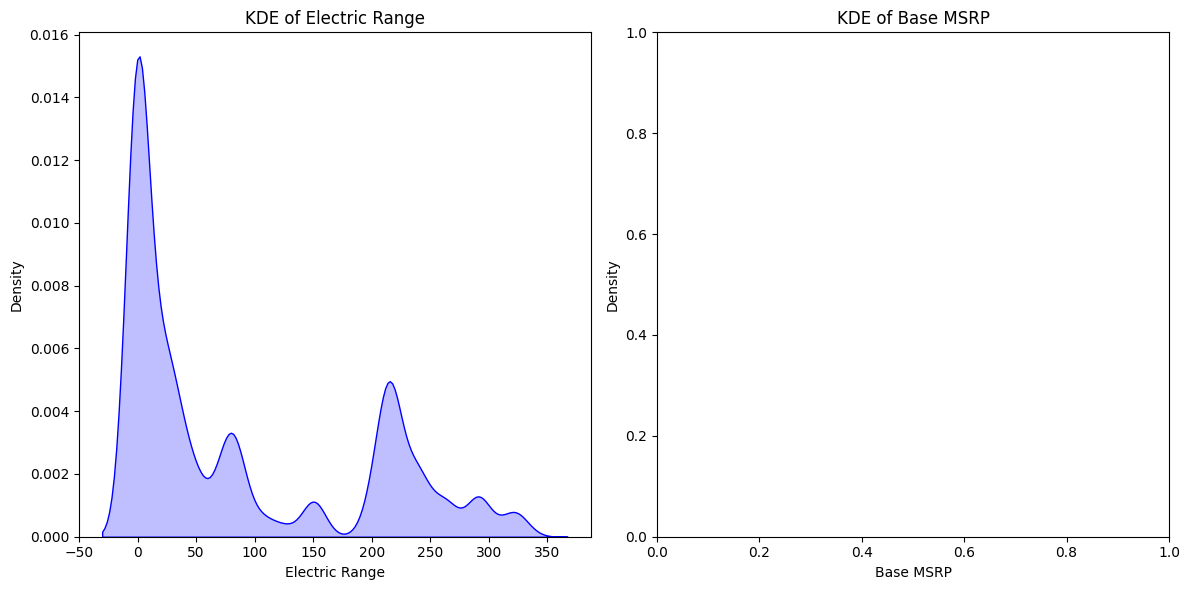

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(df_clean['Electric Range'], color='blue', shade=True)
plt.title('KDE of Electric Range')

plt.subplot(1, 2, 2)
sns.kdeplot(df_clean['Base MSRP'], color='green', shade=True)
plt.title('KDE of Base MSRP')

plt.tight_layout()
plt.show()

In [23]:
print(df_clean['Make'].value_counts())
print(df_clean['Electric Vehicle Type'].value_counts())

Make
28    50393
22    12880
5     10182
8      5819
30     4405
3      4190
14     3838
31     2514
0      2332
32     1991
6      1675
11     1412
13     1152
25      885
7       822
10      792
24      786
21      588
23      558
19      506
20      482
26      273
12      219
17      168
4        92
18       65
15       38
16       33
9        18
1         7
29        3
2         3
27        1
Name: count, dtype: int64
Electric Vehicle Type
0    83714
1    25408
Name: count, dtype: int64


<ipython-input-24-190a78f53874>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Make', data=df_clean, order=df_clean['Make'].value_counts().index, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Future

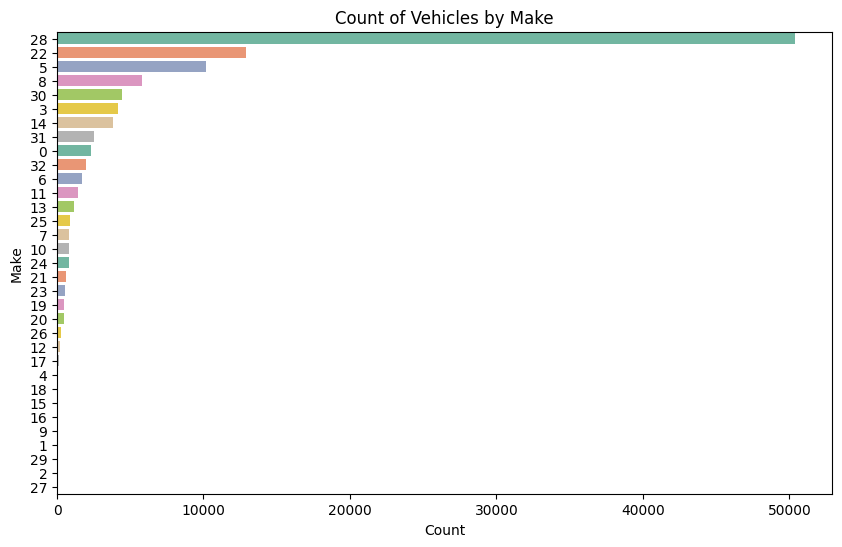

<ipython-input-24-190a78f53874>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Electric Vehicle Type', data=df_clean, palette='Set1')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


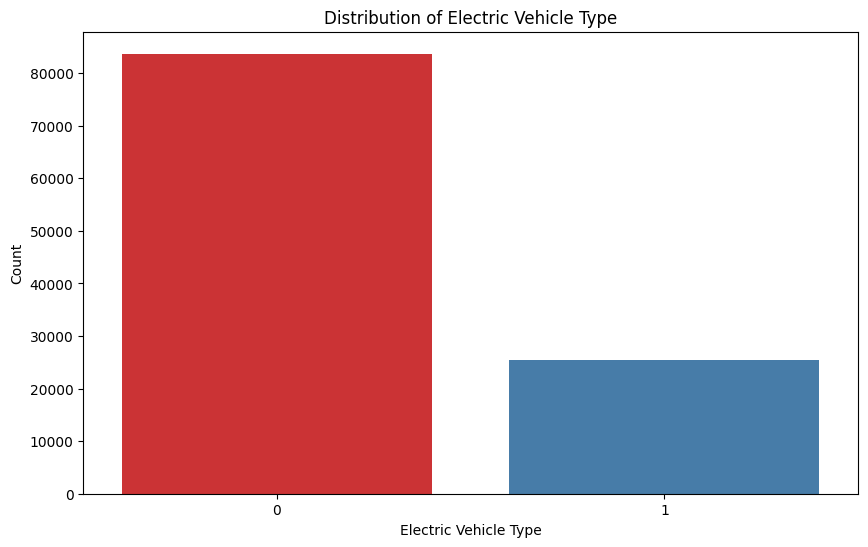

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Make', data=df_clean, order=df_clean['Make'].value_counts().index, palette='Set2')
plt.title('Count of Vehicles by Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', data=df_clean, palette='Set1')
plt.title('Distribution of Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

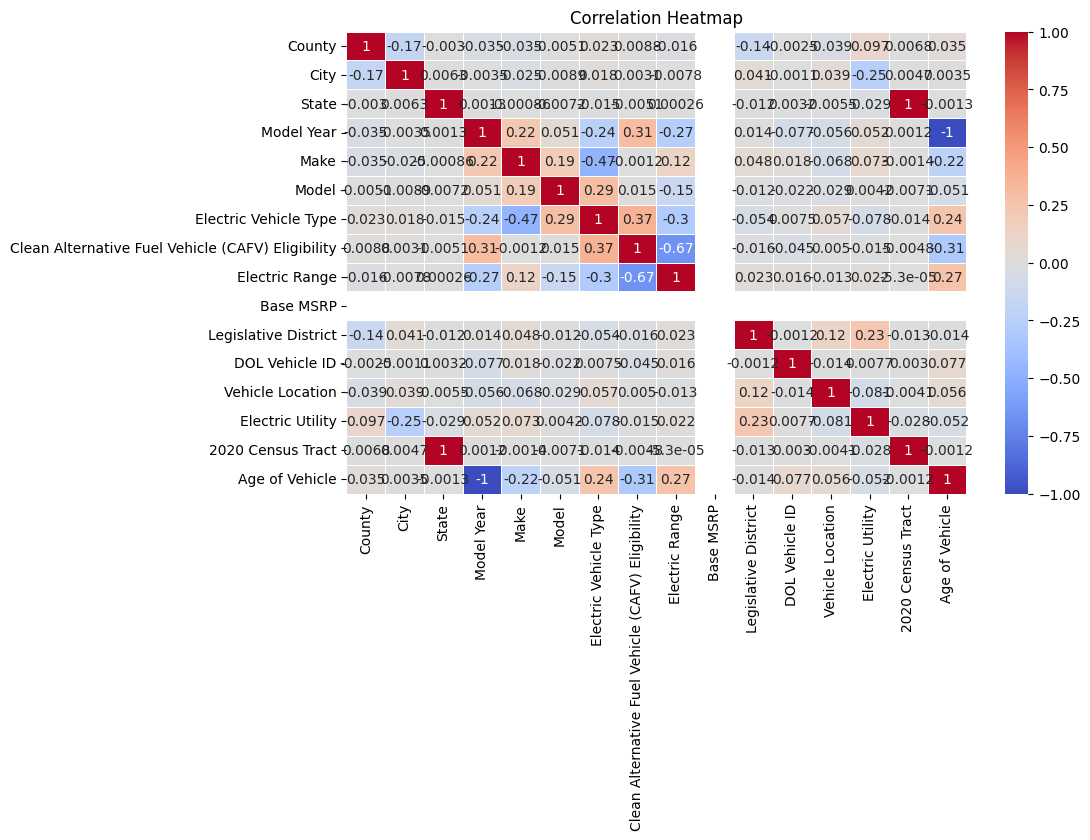

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df_clean.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

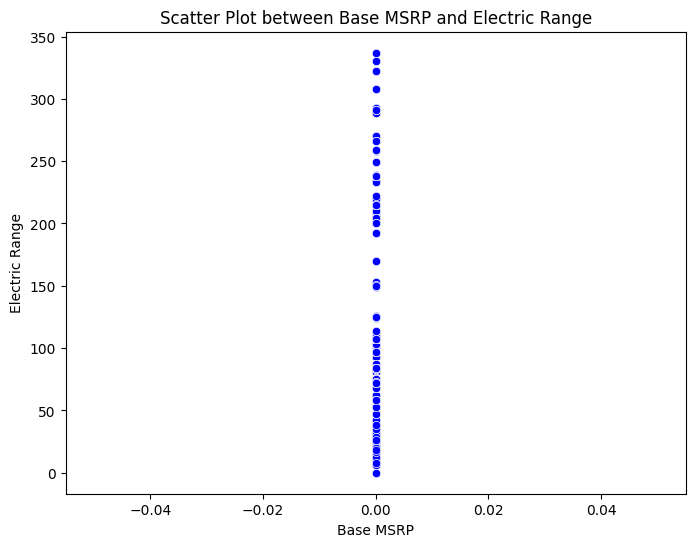

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df_clean, color='blue')
plt.title('Scatter Plot between Base MSRP and Electric Range')
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range')
plt.show()

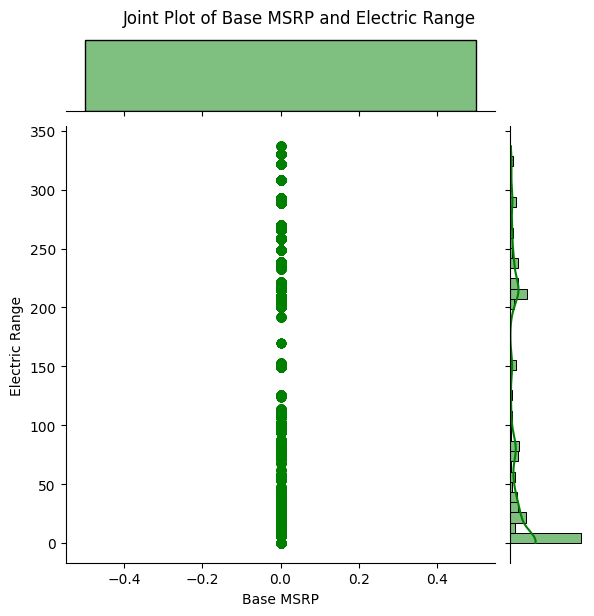

In [31]:
sns.jointplot(x='Base MSRP', y='Electric Range', data=df_clean, kind='reg', color='green')
plt.suptitle('Joint Plot of Base MSRP and Electric Range', y=1.02)
plt.show()

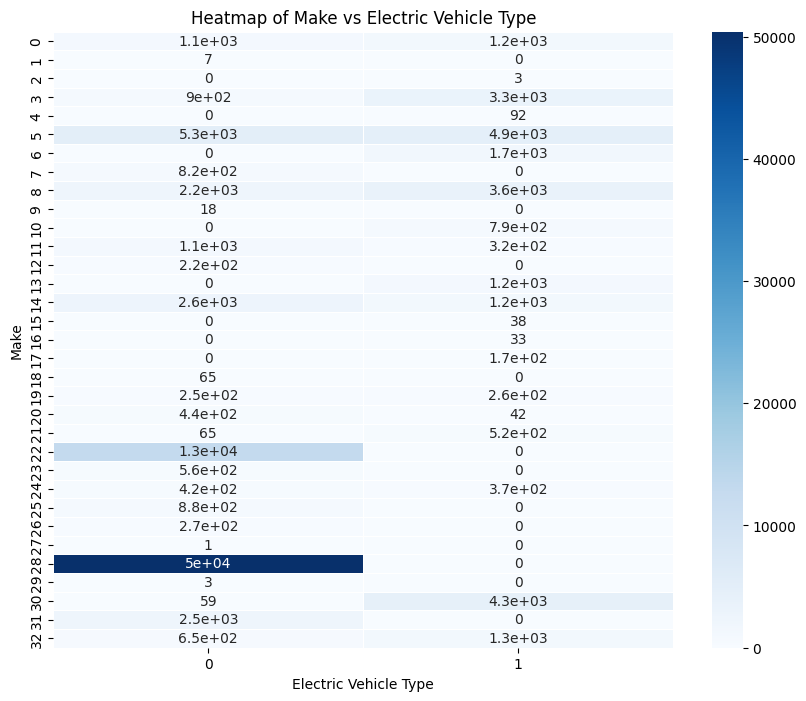

In [32]:
cross_tab = pd.crosstab(df_clean['Make'], df_clean['Electric Vehicle Type'])
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Make vs Electric Vehicle Type')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


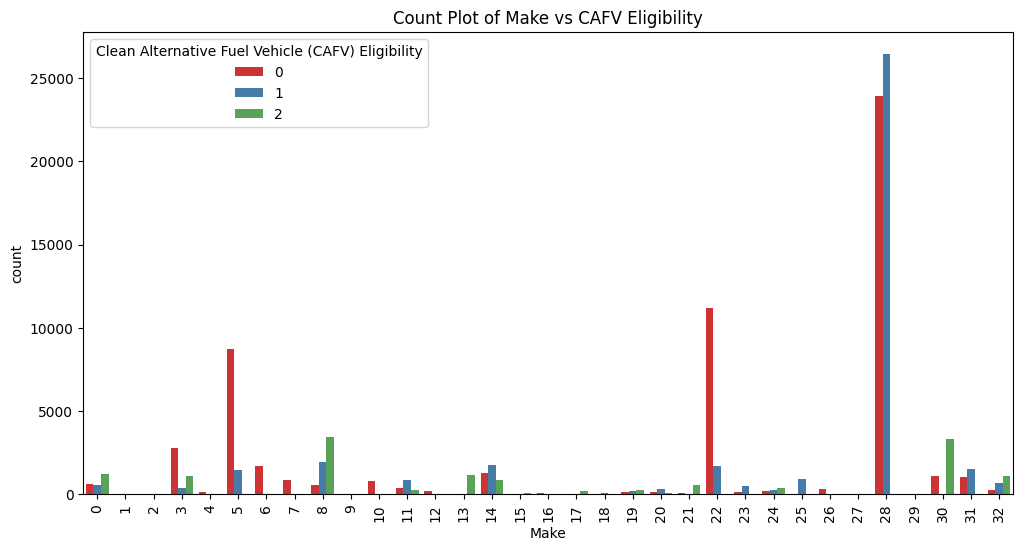

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Make', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=df_clean, palette='Set1')
plt.title('Count Plot of Make vs CAFV Eligibility')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


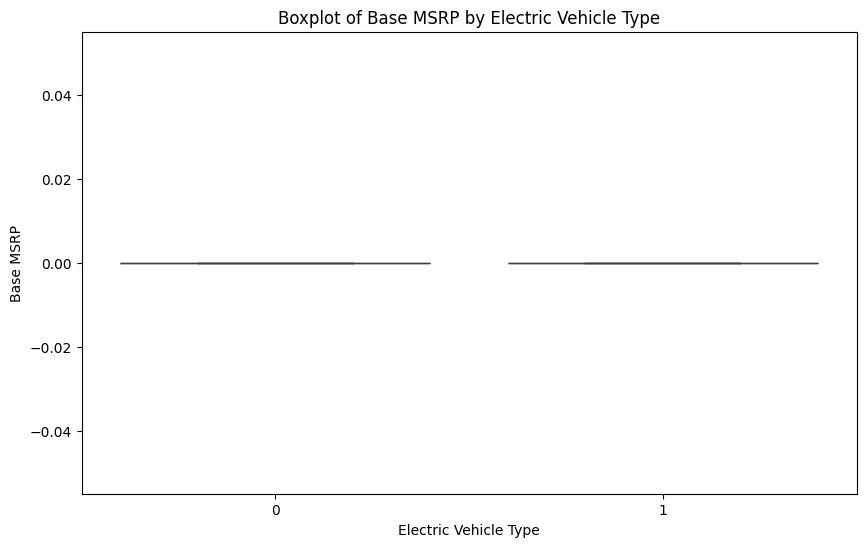

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=df_clean)
plt.title('Boxplot of Base MSRP by Electric Vehicle Type')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


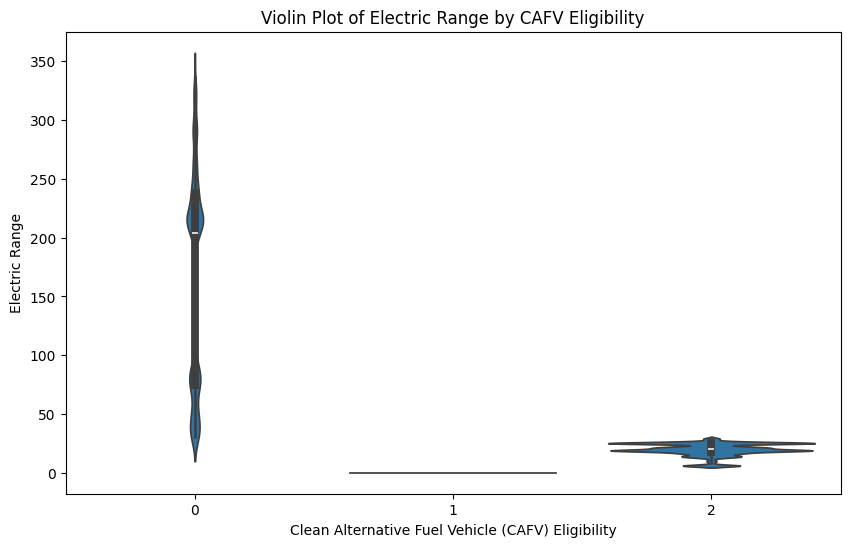

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range', data=df_clean)
plt.title('Violin Plot of Electric Range by CAFV Eligibility')
plt.show()

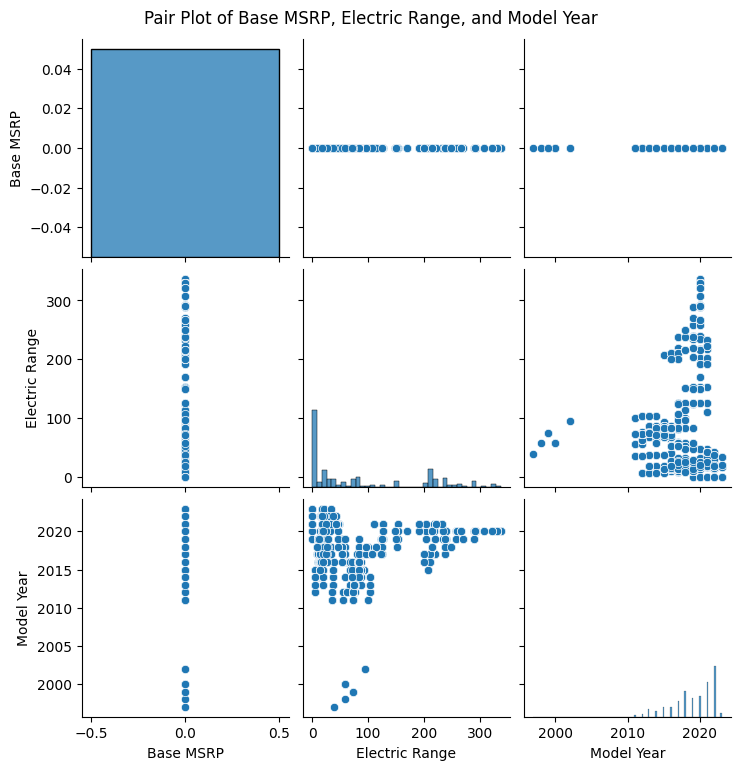

In [36]:
sns.pairplot(df_clean[['Base MSRP', 'Electric Range', 'Model Year']])
plt.suptitle('Pair Plot of Base MSRP, Electric Range, and Model Year', y=1.02)
plt.show()

# TASK-2: Choropleth using plotly.express to display the number of EV vehicles based on location.


In [43]:
state_year_aggregated = df.groupby(['State', 'Model Year']).size().reset_index(name='EV Count')

fig = px.choropleth(
    state_year_aggregated,
    locations='State',
    locationmode='USA-states',
    color='EV Count',
    hover_name='State',
    animation_frame='Model Year',
    scope='usa',
    color_continuous_scale='Viridis',
    title='EV Count by State Over Time'
)

fig.update_layout(
    geo=dict(
        scope='usa',
        projection={'type': 'albers usa'}
    ),
    transition={'duration': 500},
    sliders=[{
        'currentvalue': {"prefix": "Year: "},
        'pad': {"t": 50}
    }]
)

fig.show()


# TASK-3:Racing Bar Plot to display the animation of EV Make and its count each year.

In [44]:
import plotly.express as px

make_year_aggregated = df.groupby(['Make', 'Model Year']).size().reset_index(name='EV Count')

fig = px.bar(
    make_year_aggregated,
    x='EV Count',
    y='Make',
    color='Make',
    animation_frame='Model Year',
    range_x=[0, make_year_aggregated['EV Count'].max() + 10],
    title='Racing Bar Plot of EV Makes by Count Each Year',
    labels={'EV Count': 'Number of EVs', 'Make': 'EV Make'},
    orientation='h'
)

fig.update_layout(yaxis_title='EV Make', xaxis_title='Number of EVs')
fig.show()
